In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
iris = pd.read_csv('Iris.csv', index_col='Id')
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [6]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
label_encoder.fit_transform(iris['Species']) 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
iris['Species'] = label_encoder.fit_transform(iris['Species']) 

y = pd.get_dummies(iris['Species'])
y.tail()

,0,1,2
Id,,,
146,0,0,1
147,0,0,1
148,0,0,1
149,0,0,1
150,0,0,1


In [14]:
x = iris.drop(['Species'], axis=1)
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


In [15]:
x.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#min_max -> 0 & 1
#stdScalar -> -1 & 1
#from sklearn.preprocessing import MinMaxScaler

#min_max = MinMaxScaler()
#x = min_max.fit_transform(x)

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [17]:
def make_model():
    model = keras.models.Sequential()
    
    model.add(keras.layers.Dense(units=10, activation='relu', input_shape=(4,)))
    model.add(keras.layers.Dense(8, activation='relu'))
    model.add(keras.layers.Dense(6, activation='relu'))
    model.add(keras.layers.Dense(3, activation='softmax'))
    
    optimizer = keras.optimizers.Adam(lr=0.04)
    loss = keras.losses.categorical_crossentropy
    metrics = ["accuracy"]
    
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
    return model

model = make_model()

In [20]:
model.fit(x_train, y_train, epochs=100, verbose=2, validation_split=.15)

Train on 102 samples, validate on 18 samples
Epoch 1/100
 - 0s - loss: 0.1047 - acc: 0.9608 - val_loss: 0.1336 - val_acc: 0.9444
Epoch 2/100
 - 0s - loss: 0.0931 - acc: 0.9608 - val_loss: 0.0579 - val_acc: 1.0000
Epoch 3/100
 - 0s - loss: 0.0934 - acc: 0.9706 - val_loss: 0.0541 - val_acc: 1.0000
Epoch 4/100
 - 0s - loss: 0.0650 - acc: 0.9804 - val_loss: 0.1047 - val_acc: 0.9444
Epoch 5/100
 - 0s - loss: 0.0919 - acc: 0.9608 - val_loss: 0.1189 - val_acc: 0.9444
Epoch 6/100
 - 0s - loss: 0.0867 - acc: 0.9608 - val_loss: 0.0568 - val_acc: 0.9444
Epoch 7/100
 - 0s - loss: 0.0803 - acc: 0.9706 - val_loss: 0.0837 - val_acc: 0.9444
Epoch 8/100
 - 0s - loss: 0.1174 - acc: 0.9608 - val_loss: 0.2938 - val_acc: 0.8889
Epoch 9/100
 - 0s - loss: 0.2319 - acc: 0.8824 - val_loss: 0.0501 - val_acc: 1.0000
Epoch 10/100
 - 0s - loss: 0.1335 - acc: 0.9608 - val_loss: 0.0457 - val_acc: 1.0000
Epoch 11/100
 - 0s - loss: 0.0986 - acc: 0.9608 - val_loss: 0.0994 - val_acc: 0.9444
Epoch 12/100
 - 0s - loss: 0.

Epoch 97/100
 - 0s - loss: 0.0628 - acc: 0.9804 - val_loss: 0.0427 - val_acc: 1.0000
Epoch 98/100
 - 0s - loss: 0.0614 - acc: 0.9804 - val_loss: 0.0717 - val_acc: 0.9444
Epoch 99/100
 - 0s - loss: 0.0592 - acc: 0.9706 - val_loss: 0.0734 - val_acc: 0.9444
Epoch 100/100
 - 0s - loss: 0.0601 - acc: 0.9706 - val_loss: 0.0732 - val_acc: 0.9444


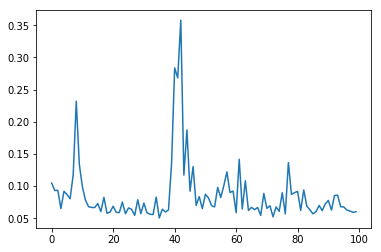

In [21]:
plt.plot(model.history.history['loss'])

In [25]:
from sklearn.metrics import mean_absolute_error as mae

y_pred = model.predict(x_test)

In [26]:
mae(y_test, y_pred)

0.019441906

In [31]:
from sklearn import metrics

In [34]:
metrics.mean_squared_error(y_test, y_pred)

0.0073493146